## Anomaly Detection using Isolation Forest

Working with Mall-Customers dataset.

Source - Kaggle

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [83]:
df = pd.read_csv('Mall_Customers.csv')

In [84]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [85]:
## Working woth only two features, Annual Income and Spending Score

df = df.drop(['CustomerID', 'Genre', 'Age'], axis=1)

In [86]:
df.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [87]:
## Anomaly detection 

from sklearn.ensemble import IsolationForest
clf = IsolationForest(contamination=0.1)
clf.fit(df)
predictions = clf.predict(df)

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [88]:
predictions

array([-1,  1, -1,  1,  1,  1,  1, -1, -1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1])

'Predictions' with value as -1 are the outliers in the dataset. 

In [89]:
index = np.where(predictions==-1)

In [90]:
index

(array([  0,   2,   7,   8,  11,  19,  22,  30,  32, 156, 158, 185, 192,
        193, 194, 195, 196, 197, 198, 199]),)

These are the indexes of the -1 values in 'predictions' array.

In [91]:
x = df.values

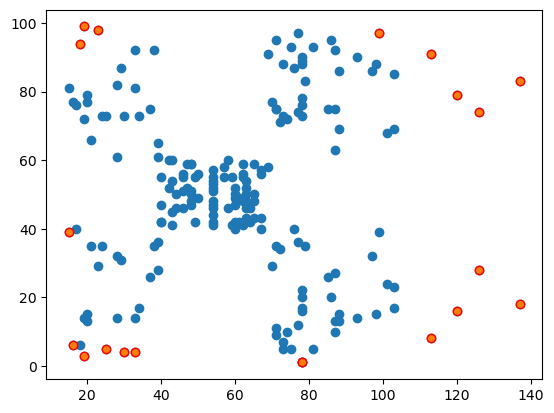

In [92]:
## Visualizng the outliers in a 2D frame

plt.scatter(df.iloc[:,0], df.iloc[:,1])
plt.scatter(x[index,0], x[index,1], edgecolors='red')

The red points on the graph are the outliers in the dataset.